In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {"accuracy":  round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)
                 }
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Precision: {precision*100:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 score: {f1:.2f}")

  return metric_dict


In [7]:
heart_disease = pd.read_csv('/content/sample_data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x and y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# splitting the data validation and test sets manually possible
train_split = round(0.7 *  len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split: valid_split], y[train_split: valid_split]
x_test, y_test = x[valid_split:], y[valid_split: ]

len(x_train), len(x_valid), len(x_test)


(212, 45, 46)

In [9]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make baseline predictions
y_preds = clf.predict(x_valid)

# evaluate classifier
baseline_metric = evaluate_preds(y_valid, y_preds)
baseline_metric

Accuracy: 82.22
Precision: 81.48
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [10]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(x_train,y_train)
y_preds_2 = clf_2.predict(x_valid)
baseline_metric2 = evaluate_preds(y_valid, y_preds_2)
baseline_metric2

Accuracy: 82.22
Precision: 84.00
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [12]:
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
clf_3.fit(x_train,y_train)
y_preds_3 = clf_3.predict(x_valid)
baseline_metric3 = evaluate_preds(y_valid, y_preds_3)
baseline_metric3

Accuracy: 82.22
Precision: 81.48
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

**Hyperparameter tuning with RandomizedSearchCV **

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# map of hyperparameters we want to adjust
grid = {"n_estimators":  [10, 100, 200, 500, 1000, 1200, 1400]
        , "max_depth": [None, 5, 10, 20, 30, 40],
        "max_features": [None, "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]
        }

np.random.seed(42)

# split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train,test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=40,
                            cv = 5, verbose = 2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=6, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=40,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200, 1400]},
                   verbose=2)

In [20]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [22]:
# make predictions using best params
rs_ypreds = rs_clf.predict(x_test)

# evaluate
rs_metrics =evaluate_preds(y_test,rs_ypreds)

Accuracy: 81.97
Precision: 74.29
Recall: 0.93
F1 score: 0.83


**Hyperparameter tuning with GridSearchCV**

In [24]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200, 1400],
 'max_depth': [None, 5, 10, 20, 30, 40],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [25]:
grid_2 = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None],
    'max_features': [None, 'sqrt'],
    'min_samples_split': [2],
    'min_samples_leaf': [1,2]
}

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)


# split into x and y
x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train,test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv = 5, verbose = 2)

# fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [10, 100, 200, 500]},
             verbose=2)

In [27]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [28]:
gs_ypreds = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test,gs_ypreds)

Accuracy: 80.33
Precision: 75.00
Recall: 0.86
F1 score: 0.80


In [31]:
# lets compare our different model's metrics
compare_metrics= pd.DataFrame({"baseline": baseline_metric, "RS metric": rs_metrics,
    "gs_metrics": gs_metrics
})

<Axes: >

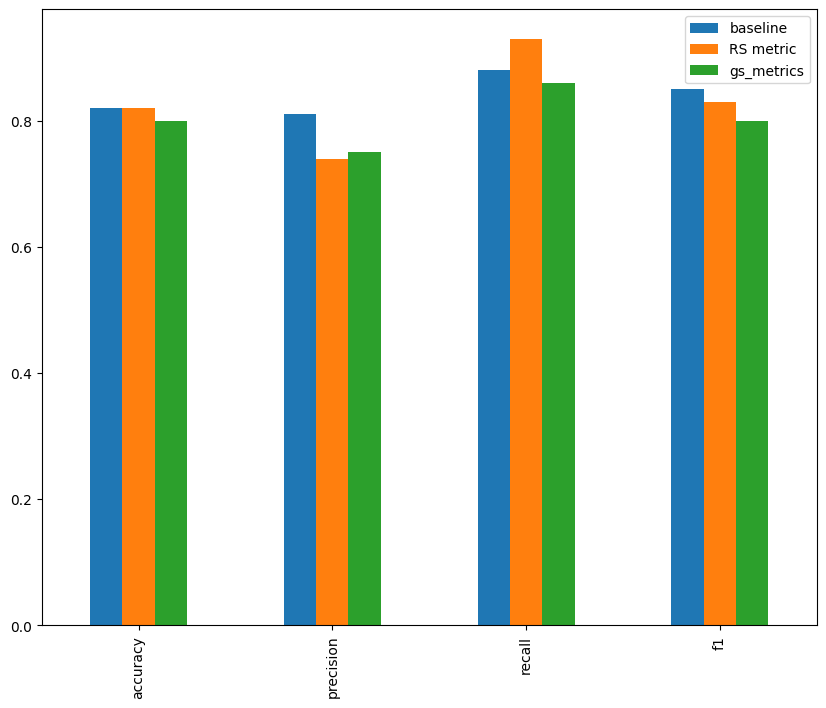

In [33]:
compare_metrics.plot.bar(figsize=(10, 8))